Este é um código Python que tenta explicar de forma didática os conceitos de Prediction Drift, Data Drift e Concept Drift. Vamos criar uma simulação clara e visual para esses fenômenos, usando um cenário onde um modelo de Machine Learning tenta prever se um cliente vai comprar um produto.

Imagine que treinamos um modelo em 2023. Agora, em 2024 e 2025, vamos observar como as mudanças no mundo real afetam o modelo.

**Código Simplificado: Data Drift, Concept Drift e Prediction Drift**


Este código irá:

* Treinar um modelo básico com dados de 2023.
* Simular Data Drift em 2024 (mudança na distribuição das idades).
* Simular Concept Drift em 2025 (mudança na regra de clique para uma dada idade).
* Visualizar a Prediction Drift (mudança nas previsões do modelo).

Iniciando a simulação DIDÁTICA SIMPLIFICADA de Deriva (Drift).

Modelo treinado com dados de 2023 (Baseline).
Média de Idade (2023): 40.05
Proporção de Cliques (2023): 0.52
Acurácia do Modelo em 2023: 0.66

--- Cenário: DATA DRIFT (2024) ---
A DISTRIBUIÇÃO da idade dos clientes mudou, mas a regra de clique NÃO mudou.
Média de Idade (2024 - Data Drift): 25.46
Proporção REAL de Cliques (2024): 0.20
Acurácia do Modelo em 2024 (pós Data Drift): 0.81

--- Cenário: CONCEPT DRIFT (2025) ---
A REGRA de como idade afeta o clique mudou, mesmo que as idades sejam como as originais.
Média de Idade (2025 - Concept Drift): 39.76
Proporção REAL de Cliques (2025): 0.53
Acurácia do Modelo em 2025 (pós Concept Drift): 0.33

--- Cenário: PREDICTION DRIFT (Sintoma) ---
A distribuição das previsões do modelo mudou em 2024 e 2025.
Média das Previsões (2023 - Baseline): 0.52
Média das Previsões (2024 - Data Drift): 0.21 (Diferente da baseline)
Média das Previsões (2025 - Concept Drift): 0.51 (Bem diferente d

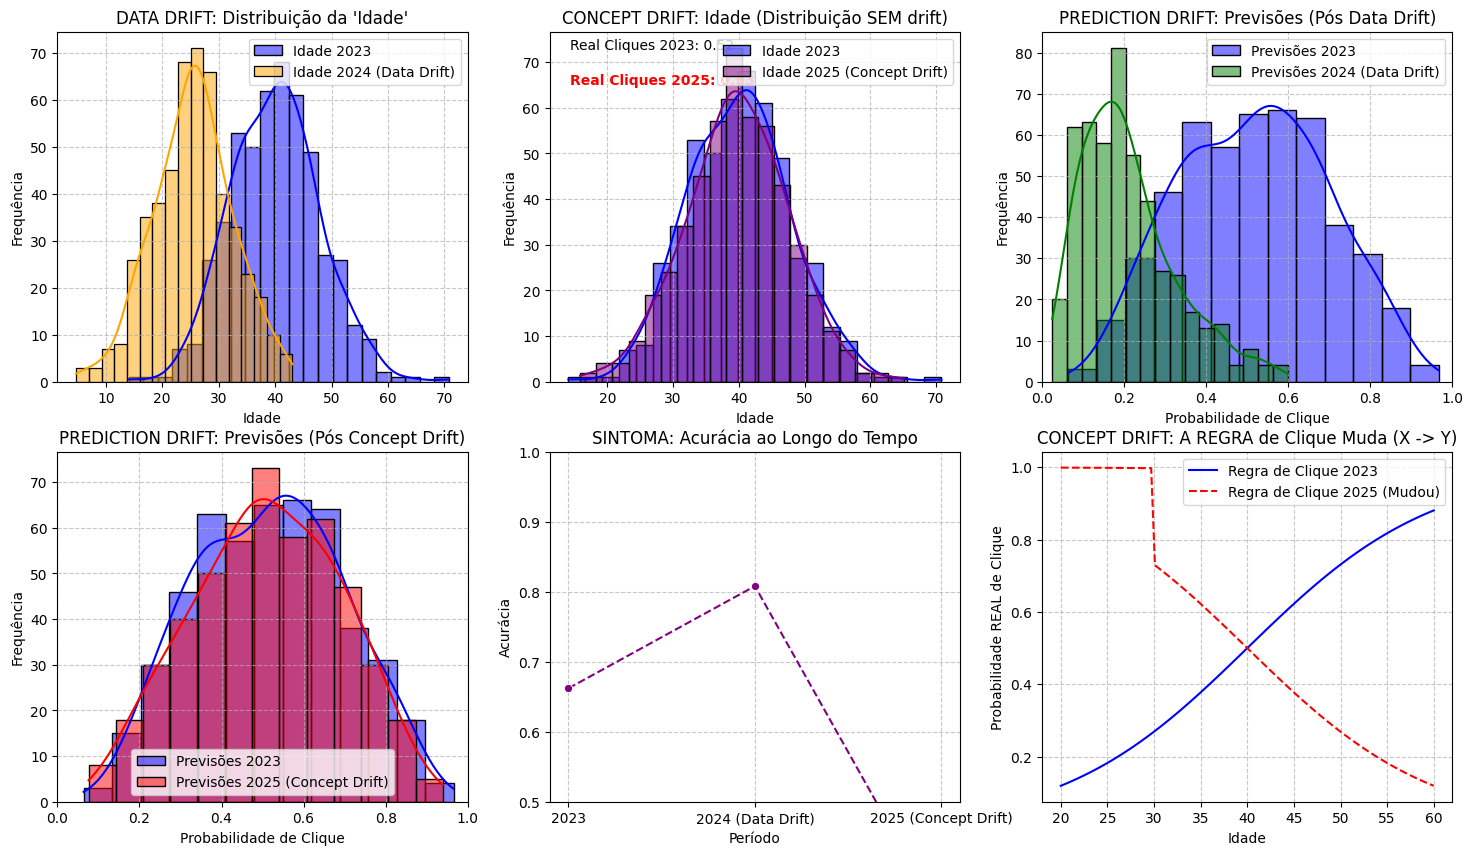


Simulação Concluída! Observe os gráficos para entender as derivas.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Iniciando a simulação DIDÁTICA SIMPLIFICADA de Deriva (Drift).\n")

# --- 1. Dados Iniciais (2023 - Modelo Base) ---
np.random.seed(42)
n_samples = 500 # Número de pessoas

# Feature: 'Idade'
# Target: 'Cliques no Anúncio' (1 se clicou, 0 se não clicou)

# Em 2023, pessoas mais velhas tendem a clicar mais
idades_2023 = np.random.normal(loc=40, scale=8, size=n_samples) # Idade média 40
prob_clique_2023 = 1 / (1 + np.exp(-(0.1 * idades_2023 - 4))) # Relação: idade alta -> prob alta
cliques_2023 = (prob_clique_2023 > np.random.rand(n_samples)).astype(int)

# Treinamos nosso modelo base
model = LogisticRegression(random_state=42)
model.fit(idades_2023.reshape(-1, 1), cliques_2023) # .reshape para 1 feature

print("Modelo treinado com dados de 2023 (Baseline).")
print(f"Média de Idade (2023): {idades_2023.mean():.2f}")
print(f"Proporção de Cliques (2023): {cliques_2023.mean():.2f}")
print(f"Acurácia do Modelo em 2023: {accuracy_score(cliques_2023, model.predict(idades_2023.reshape(-1, 1))):.2f}\n")


# --- 2. Simulação de DATA DRIFT (2024) ---
# A DISTRIBUIÇÃO DAS IDADES MUDA, mas a regra de clique continua a mesma.
# Exemplo: Entraram muitos jovens na nossa base de usuários.

print("--- Cenário: DATA DRIFT (2024) ---")
print("A DISTRIBUIÇÃO da idade dos clientes mudou, mas a regra de clique NÃO mudou.")

idades_2024_drift_data = np.random.normal(loc=25, scale=7, size=n_samples) # Idade média 25 (mais jovens)
# A regra REAL de clique é a mesma de 2023, aplicada às novas idades
prob_clique_2024_real = 1 / (1 + np.exp(-(0.1 * idades_2024_drift_data - 4)))
cliques_2024_real = (prob_clique_2024_real > np.random.rand(n_samples)).astype(int)

# Previsões do modelo de 2023 nos dados de 2024
predicoes_2024_data_drift = model.predict(idades_2024_drift_data.reshape(-1, 1))
prob_predicoes_2024_data_drift = model.predict_proba(idades_2024_drift_data.reshape(-1, 1))[:, 1]

print(f"Média de Idade (2024 - Data Drift): {idades_2024_drift_data.mean():.2f}")
print(f"Proporção REAL de Cliques (2024): {cliques_2024_real.mean():.2f}")
print(f"Acurácia do Modelo em 2024 (pós Data Drift): {accuracy_score(cliques_2024_real, predicoes_2024_data_drift):.2f}\n")


# --- 3. Simulação de CONCEPT DRIFT (2025) ---
# A DISTRIBUIÇÃO DAS IDADES VOLTA A SER COMO 2023, mas a REGRA DE CLIQUE MUDA.
# Exemplo: Uma nova tendência faz com que jovens (menos de 30 anos) comecem a clicar MUITO MAIS.

print("--- Cenário: CONCEPT DRIFT (2025) ---")
print("A REGRA de como idade afeta o clique mudou, mesmo que as idades sejam como as originais.")

idades_2025_drift_concept = np.random.normal(loc=40, scale=8, size=n_samples) # Idade média 40 (como 2023)
# NOVA REGRA de clique em 2025: Idades menores que 30 agora clicam MUITO
prob_clique_2025_real = 1 / (1 + np.exp(-(-0.1 * idades_2025_drift_concept + 4 + 5 * (idades_2025_drift_concept < 30))))
cliques_2025_real = (prob_clique_2025_real > np.random.rand(n_samples)).astype(int)

# Previsões do modelo de 2023 nos dados de 2025
predicoes_2025_concept_drift = model.predict(idades_2025_drift_concept.reshape(-1, 1))
prob_predicoes_2025_concept_drift = model.predict_proba(idades_2025_drift_concept.reshape(-1, 1))[:, 1]

print(f"Média de Idade (2025 - Concept Drift): {idades_2025_drift_concept.mean():.2f}")
print(f"Proporção REAL de Cliques (2025): {cliques_2025_real.mean():.2f}")
print(f"Acurácia do Modelo em 2025 (pós Concept Drift): {accuracy_score(cliques_2025_real, predicoes_2025_concept_drift):.2f}\n")


# --- 4. PREDICTION DRIFT (O Sintoma) ---
# A distribuição das previsões do seu modelo muda.

print("--- Cenário: PREDICTION DRIFT (Sintoma) ---")
print("A distribuição das previsões do modelo mudou em 2024 e 2025.")

prob_predicoes_2023_baseline = model.predict_proba(idades_2023.reshape(-1, 1))[:, 1]

print(f"Média das Previsões (2023 - Baseline): {prob_predicoes_2023_baseline.mean():.2f}")
print(f"Média das Previsões (2024 - Data Drift): {prob_predicoes_2024_data_drift.mean():.2f} (Diferente da baseline)")
print(f"Média das Previsões (2025 - Concept Drift): {prob_predicoes_2025_concept_drift.mean():.2f} (Bem diferente da baseline)\n")


# --- 5. Visualizações Didáticas ---

plt.figure(figsize=(18, 10))

# 5.1. Visualização de DATA DRIFT (Idade)
plt.subplot(2, 3, 1)
sns.histplot(idades_2023, color="blue", kde=True, label="Idade 2023", alpha=0.5)
sns.histplot(idades_2024_drift_data, color="orange", kde=True, label="Idade 2024 (Data Drift)", alpha=0.5)
plt.title("DATA DRIFT: Distribuição da 'Idade'")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 5.2. Visualização de CONCEPT DRIFT (Relação Idade -> Clique)
# Aqui, a acurácia é o melhor indicador, e a proporção de cliques muda apesar da idade ser similar
plt.subplot(2, 3, 2)
sns.histplot(idades_2023, color="blue", kde=True, label="Idade 2023", alpha=0.5)
sns.histplot(idades_2025_drift_concept, color="purple", kde=True, label="Idade 2025 (Concept Drift)", alpha=0.5)
plt.title("CONCEPT DRIFT: Idade (Distribuição SEM drift)")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.text(0.05, 0.95, f'Real Cliques 2023: {cliques_2023.mean():.2f}', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.05, 0.85, f'Real Cliques 2025: {cliques_2025_real.mean():.2f}', transform=plt.gca().transAxes, fontsize=10, color='red', weight='bold')

# 5.3. Visualização de PREDICTION DRIFT (Previsões do Modelo)
plt.subplot(2, 3, 3)
sns.histplot(prob_predicoes_2023_baseline, color="blue", kde=True, label="Previsões 2023", alpha=0.5)
sns.histplot(prob_predicoes_2024_data_drift, color="green", kde=True, label="Previsões 2024 (Data Drift)", alpha=0.5)
plt.title("PREDICTION DRIFT: Previsões (Pós Data Drift)")
plt.xlabel("Probabilidade de Clique")
plt.ylabel("Frequência")
plt.legend()
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 4)
sns.histplot(prob_predicoes_2023_baseline, color="blue", kde=True, label="Previsões 2023", alpha=0.5)
sns.histplot(prob_predicoes_2025_concept_drift, color="red", kde=True, label="Previsões 2025 (Concept Drift)", alpha=0.5)
plt.title("PREDICTION DRIFT: Previsões (Pós Concept Drift)")
plt.xlabel("Probabilidade de Clique")
plt.ylabel("Frequência")
plt.legend()
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)

# 5.4. Acurácia como Sintoma Geral
plt.subplot(2, 3, 5)
periodos = ['2023', '2024 (Data Drift)', '2025 (Concept Drift)']
acuracias = [
    accuracy_score(cliques_2023, model.predict(idades_2023.reshape(-1, 1))),
    accuracy_score(cliques_2024_real, predicoes_2024_data_drift),
    accuracy_score(cliques_2025_real, predicoes_2025_concept_drift)
]
sns.lineplot(x=periodos, y=acuracias, marker='o', linestyle='--', color='purple')
plt.title("SINTOMA: Acurácia ao Longo do Tempo")
plt.xlabel("Período")
plt.ylabel("Acurácia")
plt.ylim(0.5, 1.0) # Ajusta o limite para melhor visualização da queda
plt.grid(True, linestyle='--', alpha=0.7)

# 5.5. Ilustração da Relação X -> Y (Conceitual)
plt.subplot(2, 3, 6)
# Representação simplificada da regra de clique
idades_plot = np.linspace(20, 60, 100)
prob_2023_plot = 1 / (1 + np.exp(-(0.1 * idades_plot - 4)))
prob_2025_plot = 1 / (1 + np.exp(-(-0.1 * idades_plot + 4 + 5 * (idades_plot < 30))))

plt.plot(idades_plot, prob_2023_plot, label='Regra de Clique 2023', color='blue', linestyle='-')
plt.plot(idades_plot, prob_2025_plot, label='Regra de Clique 2025 (Mudou)', color='red', linestyle='--')
plt.title("CONCEPT DRIFT: A REGRA de Clique Muda (X -> Y)")
plt.xlabel("Idade")
plt.ylabel("Probabilidade REAL de Clique")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nSimulação Concluída! Observe os gráficos para entender as derivas.")

1. DATA DRIFT (Deriva de Dados)
* O que acontece: Em 2024, a distribuição das idades dos clientes muda. Agora, recebemos muitos clientes mais jovens.
* No gráfico "DATA DRIFT: Distribuição da 'Idade'": Você verá que a curva de Idade 2024 (laranja) está claramente deslocada para a esquerda em relação à curva de Idade 2023 (azul). Isso é a deriva de dados.
* Impacto no Modelo: O modelo ainda pensa que "pessoas mais velhas clicam mais". Mas como agora ele vê mais pessoas jovens, ele naturalmente prevê menos cliques no geral, e sua acurácia pode cair porque está aplicando a regra antiga a um novo perfil de cliente.
2. CONCEPT DRIFT (Deriva de Conceito)
* O que acontece: Em 2025, a distribuição das idades volta a ser como 2023, mas a regra de clique muda. Agora, uma nova tendência faz com que pessoas mais jovens cliquem MUITO.
* No gráfico "CONCEPT DRIFT: Idade (Distribuição SEM drift)": As curvas de idade 2023 (azul) e 2025 (roxo) se sobrepõem bastante, indicando que NÃO houve Data Drift nas idades.
* No gráfico "CONCEPT DRIFT: A REGRA de Clique Muda (X -> Y)": As linhas de "Regra de Clique 2023" e "Regra de Clique 2025" são diferentes. A regra de 2025 mostra que jovens têm alta probabilidade de clique, ao contrário de 2023. Isso é a deriva de conceito.
* Impacto no Modelo: O modelo de 2023 ainda acredita que "pessoas mais velhas clicam mais", o que está errado para os jovens em 2025. Isso causa uma grande queda na acurácia, porque o próprio "conhecimento" do modelo sobre o mundo está obsoleto.
3. PREDICTION DRIFT (Deriva de Previsão)
* O que acontece: A Prediction Drift é o sintoma que você observa nas previsões do seu modelo.
Nos gráficos "PREDICTION DRIFT: Previsões":
* Compare as barras azuis (previsões de 2023) com as barras verdes (previsões de 2024 - Data Drift). A distribuição das probabilidades de clique mudou, provavelmente para valores menores, porque o modelo está vendo mais jovens.
* Compare as barras azuis (previsões de 2023) com as barras vermelhas (previsões de 2025 - Concept Drift). A distribuição das probabilidades de clique mudou drasticamente, indicando que o modelo não está mais mapeando as idades para cliques como deveria.
* Resultado: Quando você vê essa mudança nas previsões, é o seu sinal de alerta para investigar se as entradas mudaram (Data Drift) ou se as regras de negócio mudaram (Concept Drift).